## 이미지 분류

### mnist 데이터

In [19]:
# 라이브러리 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# version
tf.__version__

'2.6.0'

In [3]:
# 데이터셋 불러오기
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# 데이터 크기
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
# 데이터 확인
import numpy as np
np.set_printoptions(linewidth=120)
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

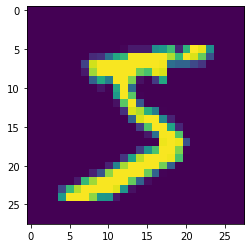

In [7]:
# 데이터 확인(이미지)
plt.imshow(X_train[0])

In [8]:
# label 확인
y_train[0]

5

In [9]:
# 모델
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(256, activation='relu'),
                    Dense(10,  activation='softmax')
])

In [10]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# 학습
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4267 - accuracy: 0.8912
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3280 - accuracy: 0.9290
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2744 - accuracy: 0.9371
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2461 - accuracy: 0.9429
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2377 - accuracy: 0.9452


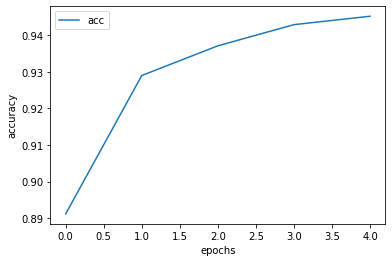

In [15]:
# 학습 정확도 (epoch에 따른 accuracy 변화)
plt.plot(history.history['accuracy'], label='acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

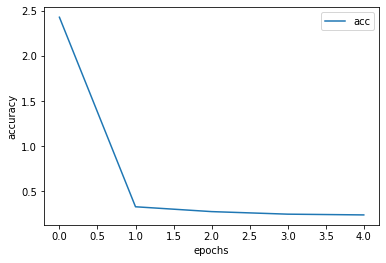

In [16]:
# 학습 정확도 (epoch에 따른 loss 변화)
plt.plot(history.history['loss'], label='acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

### fashion_mnist 데이터

In [17]:
# 라이브러리 불러오기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# 데이터셋 불러오기
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
# 데이터 크기
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## fashion_mnist 데이터

In [8]:
# 라이브러리 불러오기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# 데이터 불러오기
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

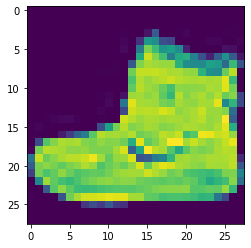

In [10]:
# 정규화 전
plt.imshow(X_train[0])

In [11]:
# 정규화(0-1 사이) -> 모델 성능이 올라감
X_train, X_test = X_train / 255.0, X_test / 255.0

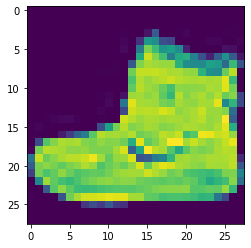

In [12]:
plt.imshow(X_train[0])

In [13]:
y_train[0]

9

In [15]:
# label 확인
classes = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot',
]
print(classes[y_train[0]])

Ankle Boot


T-shirt/top


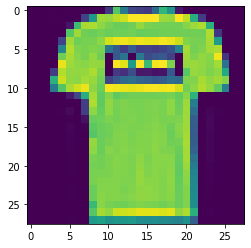

In [17]:
# 데이터 확인(이미지, 레이블)
print(classes[y_train[1]])
plt.imshow(X_train[1])

In [18]:
# 라이브러리 불러오기
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

# 모델
model = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(128, activation='relu'),
                    Dropout(0.2),
                    Dense(10, activation='softmax')
])

# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # one-hot encoding 되어 있는 경우 categorical_crossentropy
              metrics=['accuracy'])

In [19]:
# 학습 -> val_loss 확인하면서 overfitting 체크하기
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5386 - accuracy: 0.8084 - val_loss: 0.4163 - val_accuracy: 0.8467
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3999 - accuracy: 0.8555 - val_loss: 0.3813 - val_accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3687 - accuracy: 0.8657 - val_loss: 0.3760 - val_accuracy: 0.8633
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3452 - accuracy: 0.8738 - val_loss: 0.3783 - val_accuracy: 0.8635
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3316 - accuracy: 0.8785 - val_loss: 0.3510 - val_accuracy: 0.8761
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3186 - accuracy: 0.8819 - val_loss: 0.3563 - val_accuracy: 0.8704
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3097 - accuracy: 0.8850 - val_loss: 0.3357 - val_accuracy:

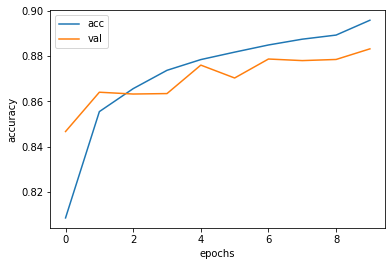

In [20]:
# 학습 정확도
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

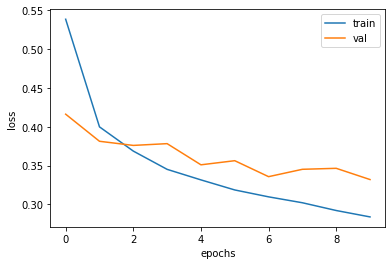

In [21]:
# loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [22]:
# 예측
pred = model.predict(X_test)
pred[1]

array([2.2012016e-05, 1.5753198e-16, 9.9973935e-01, 1.3046593e-12,
       1.2315312e-04, 1.3651152e-17, 1.1553794e-04, 1.9551862e-22,
       4.3375392e-14, 9.0099970e-18], dtype=float32)

In [23]:
# 가장 높은 값 찾기 (np.argmax()는 데이터 중 가장 높은 인덱스 값 반환)
np.argmax(pred[1])

2

In [24]:
# 실제 label
classes[y_test[1]]

'Pullover'

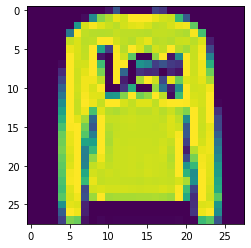

In [25]:
# 이미지 확인
plt.imshow(X_test[1])

## CNN을 활용한 이미지 분류
- CNN : Convolutional Neural Network

In [21]:
# 라이브러리 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

# 데이터 불러오기 
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# shape 변경
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# 정규화 (0~1 사이)
X_train, X_test = X_train / 255.0, X_test / 255.0


# 모델
model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                    MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')
])

# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 학습
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 145s 77ms/step - loss: 0.2081 - accuracy: 0.9356 - val_loss: 0.0766 - val_accuracy: 0.9760
Epoch 2/5
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0689 - accuracy: 0.9784 - val_loss: 0.0500 - val_accuracy: 0.9841
Epoch 3/5
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0490 - accuracy: 0.9844 - val_loss: 0.0475 - val_accuracy: 0.9857
Epoch 4/5
1875/1875 [==============================] - 147s 79ms/step - loss: 0.0375 - accuracy: 0.9886 - val_loss: 0.0477 - val_accuracy: 0.9849
Epoch 5/5
1875/1875 [==============================] - 147s 78ms/step - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.0450 - val_accuracy: 0.9854


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

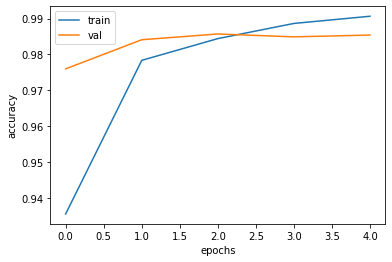

In [23]:
# 학습 정확도
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()